# Documentation  
Shapely: https://shapely.readthedocs.io/en/latest/index.html  
GeoPandas: https://geopandas.org/en/stable/docs/user_guide/data_structures.html  
Gis with Python: https://automating-gis-processes.github.io/CSC/notebooks/L4/Point-in-polygon.html  
Earth Data Analytics Online Certificate: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/  

# Topic Modelling  
Intro of LDA Topic Modelling with Gensim: https://www.youtube.com/watch?v=TKjjlp5_r7o&ab_channel=PythonTutorialsforDigitalHumanities  
with R: https://www.youtube.com/watch?v=IUAHUEy1V0Q&ab_channel=SummerInstituteinComputationalSocialScience  
Good series: https://www.youtube.com/watch?v=N0crN8YnF8Y&list=PL2VXyKi-KpYttggRATQVmgFcQst3z6OlX&ab_channel=PythonTutorialsforDigitalHumanities

Web: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

import time
# import datetime 
from datetime import timedelta

# Combine CSV by Month

In [74]:
Path = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Kenya_Tweets_All/2020/'
os.listdir(Path)

['2020-02.csv',
 '2020-11.zip',
 '2020-05.zip',
 '2020-04.zip',
 '2020-10.zip',
 '2020-03.csv',
 '2020-01.csv',
 '2020-06.zip',
 '2020-12.zip',
 '2020-07.zip',
 '2020-10.csv',
 '2020-04.csv',
 '.DS_Store',
 '2020-03.zip',
 '2020-02.zip',
 '2020-05.csv',
 '2020-11.csv',
 '2020-07.csv',
 '2020-01.zip',
 '2020-06.csv',
 '2020-12',
 '2020-08.csv',
 'Processed',
 '2020-09.csv',
 '2020-09.zip',
 '2020-08.zip']

In [75]:
Month = ['2020-12']
for month in Month:
    Source = Path + str(month) + '/'
    Destin = Path
    os.chdir(Source) 
    
    # Combine CSV per Month
    all_filenames = [i for i in glob.glob('*.csv')]
    df_Combined = pd.concat([pd.read_csv(f, lineterminator='\n') for f in all_filenames])
    
#     df_Combined = df_Combined[df_Combined['lat'].notna()] # Only take if lat is not NaN
#     df_Combined = df_Combined[df_Combined['lon'].notna()] # Only take if lon is not NaN

    df_Combined = df_Combined.fillna(0) 
    df_Combined
    FinalFile = str(month) + '.csv'
    df_Combined.to_csv(Destin + FinalFile, index = False)
    print(str(month) + str(':') + 'Done')

2020-12:Done


# Combine CSV by Year

In [83]:
Year = ['2014', '2015', '2016', '2018', '2019', '2020', '2021', '2022']
# Year = ['2017']


for year in Year:
    
    # Define Path
    Source = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Kenya_Tweets_All/' + str(year)
    Destin = Source + '/Processed/'
    os.chdir(Source)     
    if os.path.exists(Destin):
        print(str(year) + ' Path Exist')
    else:
        os.makedirs(Destin)
        print(str(year) + ' Path Made')
    
    # Combine CSV per Year
    all_filenames = [i for i in glob.glob('*.csv')]
    df_Combined = pd.concat([pd.read_csv(f, lineterminator='\n') for f in all_filenames])
    df_Combined = df_Combined.fillna(0) 
    
    df_Combined["created_at"] = pd.to_datetime(df_Combined["created_at"])
    df_Combined = df_Combined.sort_values(by=['created_at'])

    FinalFile = str(year) + '.csv'
    df_Combined.to_csv(Destin + FinalFile, index = False)
    print(str(year) + ' Export Done')

2014 Path Exist
2014 Export Done
2015 Path Exist
2015 Export Done
2016 Path Exist
2016 Export Done
2018 Path Exist
2018 Export Done
2019 Path Exist
2019 Export Done
2020 Path Exist
2020 Export Done
2021 Path Exist
2021 Export Done
2022 Path Exist
2022 Export Done


# Identify Missing Times

In [79]:
# Define Path
Year = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
# Year = ['2019', '2020', '2021', '2022']


for year in Year:    
    # Define Path
    Source = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Kenya_Tweets_All/' + str(year) + '/Processed/'
    FinalFile = str(year) + '.csv'
    df_Combined = pd.read_csv(Source + FinalFile, lineterminator='\n')
    print(FinalFile + ' Read')
    
    # Identify Error Indexs
    df_Combined["created_at"] = pd.to_datetime(df_Combined["created_at"])
    df_Combined = df_Combined.sort_values(by=['created_at'])
    df_Combined = df_Combined.reset_index()
    del df_Combined['index']
    
    df_Combined['Timedelta'] = ''
    df_Combined['indexNu'] = ''
    
    TimeList = df_Combined["created_at"].tolist()    # Create list
    TimeDelta = [y - x for x,y in zip(TimeList, TimeList[1:])]  # Calculate the time delta per continues tweet
    TimeDelta.append(timedelta(seconds=1))
    df_Combined.Timedelta = TimeDelta
    df_Combined.indexNu = range(0, len(df_Combined))
    
    IndexList = [i for i in range(len(TimeDelta)) if TimeDelta[i] > timedelta(hours = 5)]  # seconds / minutes / hours
    TimeIndexList = [df_Combined['created_at'][i] for i in range(len(TimeDelta)) if TimeDelta[i] > timedelta(hours = 5)]  # seconds / minutes
    DeltaTimeList = [df_Combined['Timedelta'][i] for i in range(len(TimeDelta)) if TimeDelta[i] > timedelta(hours = 5)]  # seconds / minutes
            
    Errordf = pd.DataFrame(columns=["ErrorIndex", 'ErrorTime', 'DeltaT']) # Error List to pandas and export
    Errordf.ErrorIndex = IndexList
    Errordf.ErrorTime = TimeIndexList
    Errordf.DeltaT = DeltaTimeList
    ErrorFile = str(year) + '_5HourError' + '.csv'
    Errordf.to_csv(Source + ErrorFile, index=False)
    print(ErrorFile + str(' Export'))  

2019.csv Read
2019_5HourError.csv Export
2020.csv Read
2020_5HourError.csv Export
2021.csv Read
2021_5HourError.csv Export
2022.csv Read
2022_5HourError.csv Export


# Select Tweets in Nairobi
to a new year dir with different months

In [2]:
# Shp file for research area(Aoi) 
shape_Nariobi = gpd.read_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NariobiShp/Nariobi.shp')
poly_Nariobi = shape_Nariobi.geometry[0]
# shape_Nariobi.crs
# shape_Nariobi

In [20]:
source = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/Kenya_Tweets_All/'
destin = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/1922/'
Year = ['2019','2020','2021','2022']

start_time = time.monotonic()

for year in Year:
    print(str(year))
    
    # Define Path
    Source = source + str(year) + '/'
    Destin = destin + str(year) + '/'

    if os.path.exists(Destin):
        print(str(year) + ' Destin Path Exist')
    else:
        os.makedirs(Destin)
        print(str(year) + ' Destin Path Created')
        
    # Check single file
    os.chdir(Source)
    for file in glob.glob("*.csv"):
        if os.path.exists(Destin + file):
            print(str(year) + file + str(' exist'))
        else:
            print(file)
            df = pd.read_csv(file, lineterminator='\n')

            # Take tweets with geotag
            df = df[df['lat'].notna()] # Only take if lat is not NaN
            df = df[df['lon'].notna()] # Only take if lat is not NaN
            df = df[df['lat'] != 0]
            df = df[df['lon'] != 0]

            # Check whether tweets in Aoi
            for i, row in df.iterrows():
                p = Point(df.loc[i]['lon'], df.loc[i]['lat'])
                if p.within(poly_Nariobi):
                    continue
                else:
                    df = df.drop(i)
            print(df.shape)
            df.to_csv(Destin + file, index=False)  # Convert to CSV
            print(str(year) + file + str('identified'))


2019
2019 Destin Path Exist
20192019-08.csvexist
20192019-09.csvexist
20192019-10.csvexist
20192019-04.csvexist
20192019-05.csvexist
20192019-11.csvexist
20192019-07.csvexist
20192019-12.csvexist
20192019-06.csvexist
20192019-02.csvexist
20192019-03.csvexist
20192019-01.csvexist


Form new df:
1. dfNew.append/concat   (5min)  
    dfNew = dfNew.append(df, ignore_index = True)  
    dfNew = pd.concat([dfNew, row], ignore_index=True)  
2. dfNew.loc     (1min)  
    dfNew.loc[count] = row
3. drop   (5s)  
    df.drop(i)  
    
Select Valid Row:
1. select not nan  
   df = df[df['lat'].notna()] # Only take if lat is not NaN
2. Fill NaN with 0, and remove all 0s  
    df1 = df.fillna(0)  
    df1 =df1[df1['lon'] !=0]  

# Sum & Export

In [37]:
# Sub-direct file

source = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/1922/'
Destin = source + 'Sum/'
Year = ['2019','2020','2021','2022']


for year in Year:
    print(str(year))
    Source = source + str(year) + '/'
    os.chdir(Source)

    all_filenames = [i for i in glob.glob('*.csv')]
    df_Combined = pd.concat([pd.read_csv(f, lineterminator='\n') for f in all_filenames])
    df_Combined = df_Combined.drop(columns=['Unnamed: 0','index', 'location'])
    
    df_Combined["created_at"] = pd.to_datetime(df_Combined["created_at"])
    df_Combined = df_Combined.sort_values(by=['created_at'])

#     Total = 'Summed.csv'
#     df_Combined.to_csv(Destin + Total, index = False)

    df_Combined.to_csv(Destin + str(year) + '.csv', index = False)
    print(str(year) + ' Sum ' + str(len(df_Combined)))

2019
2019 Sum 114321
2020
2020 Sum 81598
2021
2021 Sum 92993
2022
2022 Sum 46546


In [41]:
# Check
df = pd.read_csv('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/1922/Sum/2022.csv', lineterminator='\n')
df = df.sort_values(by=['created_at'])
df

,id,text,userid,lat,lon,created_at
0,1476933613883203592,"Under African skies ❤️ @ Parklands, Nairobi Ar...",2185583134,-1.250000,36.800000,2021-12-31 15:09:48+00:00
1,1476935526817140762,"Go and be the salt on the earth, light to the ...",58430257,-1.281249,36.905683,2021-12-31 15:17:24+00:00
2,1476938559655485440,Pon location\n@roxylounge_club \nOne man army\...,830095907274256384,-1.288322,36.950145,2021-12-31 15:29:27+00:00
3,1476938726597144583,Life isn't always onward and upward.\n\n#2021A...,278039769,-1.283330,36.816700,2021-12-31 15:30:07+00:00
4,1476940383141699589,Ndio kufunga mwaka... Let's purpose to meet fr...,394652515,-1.283330,36.816700,2021-12-31 15:36:42+00:00
...,...,...,...,...,...,...
46542,1542517994080702464,✦ [ Sakaja ]\n\nQuestion from an American\n\nh...,1269598733878079488,-1.292066,36.821945,2022-06-30 14:38:43+00:00
46540,1542517995347406850,"Hello everyone, I love black tea and have rece...",1269598733878079488,-1.292066,36.821945,2022-06-30 14:38:43+00:00
46543,1542518238566703108,Just posted a photo @ Adams Arcade - Ngong Roa...,1339887369495916545,-1.300567,36.780725,2022-06-30 14:39:41+00:00
46544,1542521919118770184,You better recognize....\nOwner: @kemeigabriel...,839394178824028160,-1.283330,36.816700,2022-06-30 14:54:18+00:00


In [46]:
# Direct file
Source = '/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/1922/Sum/'
Destin = Source 

os.chdir(Source)

all_filenames = [i for i in glob.glob('*.csv')]
df_Combined = pd.concat([pd.read_csv(f, lineterminator='\n') for f in all_filenames])
df_Combined["created_at"] = pd.to_datetime(df_Combined["created_at"])
df_Combined = df_Combined.sort_values(by=['created_at'])

df_Combined = df_Combined.fillna(0)
# df_Combined


Total = 'Summary.csv'
df_Combined.to_csv(Destin + Total, index = False)
print(len(df_Combined))

335458


In [47]:
# Check
df = pd.read_csv('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Twitter/1922/Sum/Summary.csv', lineterminator='\n')
df

,id,text,userid,lat,lon,created_at
0,1079755309281890305,Quick Pose Before The Vibe @KIZAnairobi @ KIZA...,149813541,-1.290832,36.782992,2018-12-31 15:05:01+00:00
1,1079759392138907649,365/365 \n#whereveryouare #haveagoodone #beTha...,208112568,-1.283333,36.816667,2018-12-31 15:21:14+00:00
2,1079760884526972928,"Happy 2019 from us @ Nairobi, Kenya https://t....",51949523,-1.283330,36.816700,2018-12-31 15:27:10+00:00
3,1079762365644660736,"We ride together, We shine together. @ Nairobi...",89940972,-1.283330,36.816700,2018-12-31 15:33:03+00:00
4,1079764407675015170,Nairobi: 6:41pm: sunset,111780330,-1.270000,36.800000,2018-12-31 15:41:10+00:00
...,...,...,...,...,...,...
335453,1542517996685369344,find only Kenyan tea and not a blend. I have o...,1269598733878079488,-1.292066,36.821945,2022-06-30 14:38:43+00:00
335454,1542517994080702464,✦ [ Sakaja ]\n\nQuestion from an American\n\nh...,1269598733878079488,-1.292066,36.821945,2022-06-30 14:38:43+00:00
335455,1542518238566703108,Just posted a photo @ Adams Arcade - Ngong Roa...,1339887369495916545,-1.300567,36.780725,2022-06-30 14:39:41+00:00
335456,1542521919118770184,You better recognize....\nOwner: @kemeigabriel...,839394178824028160,-1.283330,36.816700,2022-06-30 14:54:18+00:00


# Change/Add CRS

In [3]:
shp = gpd.read_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/LANDUSE_FINAL10_12.shp')
shp

,OBJECTID,ID,LANDUSE,NAME,GENERAL_DE,ACRE,BUILDINGS,NOTES,BUILD_PER,DENSITY,area,areadou,Shape_Leng,Shape_Area,geometry
0,1,0,unknown,None,rural developed land,0.353232,3,None,0,8.493001,1429,1429.485,140.233280,1429.485090,"POLYGON ((252023.349 9852054.223, 252008.149 9..."
1,2,0,industrial,None,oil tanks,1.030860,0,None,0,0.000000,4172,4171.760,288.042164,4171.767355,"POLYGON ((252045.749 9851995.723, 252076.149 9..."
2,3,0,industrial,None,oil tanks,0.309953,0,None,0,0.000000,1254,1254.340,129.336080,1254.340250,"POLYGON ((252045.149 9852013.123, 252037.349 9..."
3,4,0,industrial,None,oil tanks,0.283834,0,None,0,0.000000,1149,1148.640,130.900918,1148.640815,"POLYGON ((252073.349 9851899.223, 252062.649 9..."
4,5,0,industrial,None,oil tanks,0.345146,0,None,0,0.000000,1397,1396.760,136.903546,1396.762025,"POLYGON ((252028.349 9851853.123, 252014.849 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,29139,0,open space,None,cultivated,0.285691,0,None,0,0.000000,1156,1156.155,158.670551,1156.158065,"POLYGON ((247321.650 9849924.113, 247341.950 9..."
29139,29140,0,open space,None,None,19.736564,0,None,0,0.000000,0,79871.360,1188.666643,79871.438025,"POLYGON ((267151.462 9849890.747, 267187.562 9..."
29140,29141,0,open space,Nairobi National Park,national park,54.853918,0,None,0,0.000000,0,221986.820,4346.938715,221987.094245,"POLYGON ((251832.456 9847842.920, 251823.456 9..."
29141,29142,0,open space,None,None,1.612950,0,None,0,0.000000,6527,6527.405,2088.892230,6527.414715,"POLYGON ((251878.857 9847468.820, 251871.657 9..."


In [4]:
shp.crs

<Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Change CRS
NairobiLanduseshp_wgs84 = shp.to_crs(epsg = 4326)
NairobiLanduseshp_wgs84

,OBJECTID,ID,LANDUSE,NAME,GENERAL_DE,ACRE,BUILDINGS,NOTES,BUILD_PER,DENSITY,area,areadou,Shape_Leng,Shape_Area,geometry
0,1,0,unknown,None,rural developed land,0.353232,3,None,0,8.493001,1429,1429.485,140.233280,1429.485090,"POLYGON ((36.77146 -1.33749, 36.77132 -1.33756..."
1,2,0,industrial,None,oil tanks,1.030860,0,None,0,0.000000,4172,4171.760,288.042164,4171.767355,"POLYGON ((36.77166 -1.33802, 36.77193 -1.33838..."
2,3,0,industrial,None,oil tanks,0.309953,0,None,0,0.000000,1254,1254.340,129.336080,1254.340250,"POLYGON ((36.77165 -1.33786, 36.77158 -1.33787..."
3,4,0,industrial,None,oil tanks,0.283834,0,None,0,0.000000,1149,1148.640,130.900918,1148.640815,"POLYGON ((36.77191 -1.33889, 36.77181 -1.33891..."
4,5,0,industrial,None,oil tanks,0.345146,0,None,0,0.000000,1397,1396.760,136.903546,1396.762025,"POLYGON ((36.77150 -1.33931, 36.77138 -1.33931..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,29139,0,open space,None,cultivated,0.285691,0,None,0,0.000000,1156,1156.155,158.670551,1156.158065,"POLYGON ((36.72921 -1.35671, 36.72939 -1.35724..."
29139,29140,0,open space,None,None,19.736564,0,None,0,0.000000,0,79871.360,1188.666643,79871.438025,"POLYGON ((36.90733 -1.35717, 36.90766 -1.35836..."
29140,29141,0,open space,Nairobi National Park,national park,54.853918,0,None,0,0.000000,0,221986.820,4346.938715,221987.094245,"POLYGON ((36.76971 -1.37556, 36.76963 -1.37500..."
29141,29142,0,open space,None,None,1.612950,0,None,0,0.000000,6527,6527.405,2088.892230,6527.414715,"POLYGON ((36.77012 -1.37894, 36.77006 -1.37849..."


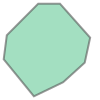

In [11]:
poly_1 = NairobiLanduseshp_wgs84.geometry[0]
poly_1

In [12]:
NairobiLanduseshp_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
NairobiLanduseshp_wgs84.to_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/4326')

/opt/miniconda3/envs/Twitter/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
# Set CRS to New

geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
gdf = GeoDataFrame(df, geometry=geometry)

gdf.set_crs(epsg=4326, inplace=True)
# ^ comment out to get a "Cannot transform naive geometries" error below

# project to merkator
gdf.to_crs(epsg=3395)

In [ ]:
# Lat & Lon to Geometry
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
gdf = GeoDataFrame(df, geometry=geometry)

gdf.set_crs(epsg=4326, inplace=True)

In [2]:
# ------------------- test -------------------
shp = gpd.read_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/KenyaLevelBoundary/ken_admbndl_admALL_iebc_itos_20191031.shp')
print(shp)

     Shape_Leng  admLevel        date     validON validTo  \
0      0.014668        99  2018-06-07  2019-10-31    None   
1      0.007563        99  2018-06-07  2019-10-31    None   
2      0.019891        99  2018-06-07  2019-10-31    None   
3      0.048525        99  2018-06-07  2019-10-31    None   
4      0.127815        99  2018-06-07  2019-10-31    None   
..          ...       ...         ...         ...     ...   
886    3.408348         0  2018-06-07  2019-10-31    None   
887    2.192634         2  2018-06-07  2019-10-31    None   
888    2.134745         0  2018-06-07  2019-10-31    None   
889    0.052929        99  2018-06-07  2019-10-31    None   
890    0.753519         0  2018-06-07  2019-10-31    None   

                                              geometry  
0    LINESTRING (39.22308 -4.66901, 39.22034 -4.671...  
1    LINESTRING (39.21667 -4.66071, 39.21472 -4.662...  
2    LINESTRING (39.22779 -4.66030, 39.22745 -4.661...  
3    LINESTRING (39.28229 -4.66699, 39.

In [3]:
shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
import rasterio
from rasterio.plot import show
fp = r'/Users/wenlanzhang/Downloads/s02_e037_1arc_v3.tif'
img = rasterio.open(fp)
show(img)

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
# Add CRS
gdfTwitter.crs = 'epsg:4326'

In [12]:
from osgeo import gdal
ds = gdal.Open('/Users/wenlanzhang/Downloads/s02_e037_1arc_v3.tif', gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
img_array = rb.ReadAsArray()

# Ground Truth Landuse File

In [12]:
shp = gpd.read_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/4326/4326.shp')
shp

# shp[shp['LANDUSE']=='commercial']

,OBJECTID,ID,LANDUSE,NAME,GENERAL_DE,ACRE,BUILDINGS,NOTES,BUILD_PER,DENSITY,area,areadou,Shape_Leng,Shape_Area,geometry
0,1,0,unknown,None,rural developed land,0.353232,3,None,0,8.493001,1429,1429.485,140.233280,1429.485090,"POLYGON ((36.77146 -1.33749, 36.77132 -1.33756..."
1,2,0,industrial,None,oil tanks,1.030860,0,None,0,0.000000,4172,4171.760,288.042164,4171.767355,"POLYGON ((36.77166 -1.33802, 36.77193 -1.33838..."
2,3,0,industrial,None,oil tanks,0.309953,0,None,0,0.000000,1254,1254.340,129.336080,1254.340250,"POLYGON ((36.77165 -1.33786, 36.77158 -1.33787..."
3,4,0,industrial,None,oil tanks,0.283834,0,None,0,0.000000,1149,1148.640,130.900918,1148.640815,"POLYGON ((36.77191 -1.33889, 36.77181 -1.33891..."
4,5,0,industrial,None,oil tanks,0.345146,0,None,0,0.000000,1397,1396.760,136.903546,1396.762025,"POLYGON ((36.77150 -1.33931, 36.77138 -1.33931..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,29139,0,open space,None,cultivated,0.285691,0,None,0,0.000000,1156,1156.155,158.670551,1156.158065,"POLYGON ((36.72921 -1.35671, 36.72939 -1.35724..."
29139,29140,0,open space,None,None,19.736564,0,None,0,0.000000,0,79871.360,1188.666643,79871.438025,"POLYGON ((36.90733 -1.35717, 36.90766 -1.35836..."
29140,29141,0,open space,Nairobi National Park,national park,54.853918,0,None,0,0.000000,0,221986.820,4346.938715,221987.094245,"POLYGON ((36.76971 -1.37556, 36.76963 -1.37500..."
29141,29142,0,open space,None,None,1.612950,0,None,0,0.000000,6527,6527.405,2088.892230,6527.414715,"POLYGON ((36.77012 -1.37894, 36.77006 -1.37849..."


In [13]:
shp = shp.drop(['ID'], axis=1)

In [14]:
# Check All Different Land use

Unique = set(shp.LANDUSE.tolist())
Unique

{'commercial',
 'industrial',
 'institutional',
 'mixed CI',
 'mixed RC',
 'no_structures',
 'open space',
 'open_space',
 'recreational',
 'res_slum',
 'residential',
 'transportation',
 'unknown',
 'water'}

In [66]:
len(Unique)

# https://datacatalog.worldbank.org/search/dataset/0041743

14

In [94]:
# Class to Number 
shp['LandUseClass'] = shp['LANDUSE'].apply(lambda x: float(12) if x == 'water' else x) 
shpTemp = shp[shp['LANDUSE'] == 'water']
shpTemp

,OBJECTID,LANDUSE,NAME,GENERAL_DE,ACRE,BUILDINGS,NOTES,BUILD_PER,DENSITY,area,areadou,Shape_Leng,Shape_Area,geometry,LandUseClass
8,9,water,None,pond,0.274642,0,None,0,0.0,1111,1111.440000,205.589697,1111.441500,"POLYGON ((36.76058 -1.33367, 36.76060 -1.33371...",12.0
9,10,water,None,None,0.437088,0,None,0,0.0,1769,1768.840000,206.557398,1768.842580,"POLYGON ((36.76170 -1.33380, 36.76169 -1.33392...",12.0
10,11,water,North Mokoyeti River,river,0.673521,0,None,0,0.0,2726,2725.655000,725.943453,2725.656760,"POLYGON ((36.76987 -1.33588, 36.77005 -1.33590...",12.0
11,12,water,North Mokoyeti River,river,1.023050,0,None,0,0.0,4140,4140.155000,1121.850721,4140.160920,"POLYGON ((36.77418 -1.33750, 36.77412 -1.33755...",12.0
12,13,water,None,None,0.002145,0,None,0,0.0,9,8.680000,43.935276,8.680035,"POLYGON ((36.77006 -1.33589, 36.77005 -1.33590...",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29131,29132,water,None,None,0.343606,0,None,0,0.0,1391,1390.530000,705.822944,1390.530920,"POLYGON ((36.72103 -1.35504, 36.72119 -1.35506...",12.0
29132,29133,water,None,None,0.993461,0,None,0,0.0,4020,4020.410000,1246.579282,4020.409820,"POLYGON ((36.72493 -1.35540, 36.72450 -1.35535...",12.0
29133,29134,water,None,None,0.896357,0,None,0,0.0,3627,3627.443675,1792.858269,3627.444885,"POLYGON ((36.72651 -1.35596, 36.72664 -1.35591...",12.0
29134,29135,water,None,None,0.633325,0,None,0,0.0,2563,2562.985000,1014.977603,2562.996495,"POLYGON ((36.72888 -1.35525, 36.72896 -1.35463...",12.0


In [95]:
# New = pd.DataFrame()
New = New.append(shpTemp)
New

/var/folders/2_/nk9j6sb901n_fk5dz_9vtqj80000gn/T/ipykernel_35276/423725096.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  New = New.append(shpTemp)


,OBJECTID,LANDUSE,NAME,GENERAL_DE,ACRE,BUILDINGS,NOTES,BUILD_PER,DENSITY,area,areadou,Shape_Leng,Shape_Area,geometry,LandUseClass
132,133,commercial,Telecom Exchange,None,0.531434,2,None,4,3.763404,2151,2150.645000,187.916355,2150.647420,"POLYGON ((36.74295 -1.35506, 36.74277 -1.35506...",1.0
133,134,commercial,Ace Communications,None,1.729584,4,None,2,2.312695,6999,6999.405000,352.801660,6999.425330,"POLYGON ((36.74176 -1.35572, 36.74118 -1.35580...",1.0
271,272,commercial,Cimbria East Africa Limited,None,6.335875,7,organic storage systems,1,1.104820,2564,25640.480000,695.829062,25640.502320,"POLYGON ((36.76272 -1.34218, 36.76264 -1.34220...",1.0
367,368,commercial,None,petrol station,0.823406,3,None,4,3.643402,3332,3332.220000,234.160868,3332.223535,"POLYGON ((36.75402 -1.34100, 36.75401 -1.34104...",1.0
658,659,commercial,Guerba Campers,None,2.099207,17,None,8,8.098295,8495,8495.225000,390.640193,8495.236640,"POLYGON ((36.76182 -1.35497, 36.76182 -1.35500...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29131,29132,water,None,None,0.343606,0,None,0,0.000000,1391,1390.530000,705.822944,1390.530920,"POLYGON ((36.72103 -1.35504, 36.72119 -1.35506...",12.0
29132,29133,water,None,None,0.993461,0,None,0,0.000000,4020,4020.410000,1246.579282,4020.409820,"POLYGON ((36.72493 -1.35540, 36.72450 -1.35535...",12.0
29133,29134,water,None,None,0.896357,0,None,0,0.000000,3627,3627.443675,1792.858269,3627.444885,"POLYGON ((36.72651 -1.35596, 36.72664 -1.35591...",12.0
29134,29135,water,None,None,0.633325,0,None,0,0.000000,2563,2562.985000,1014.977603,2562.996495,"POLYGON ((36.72888 -1.35525, 36.72896 -1.35463...",12.0


<AxesSubplot:>

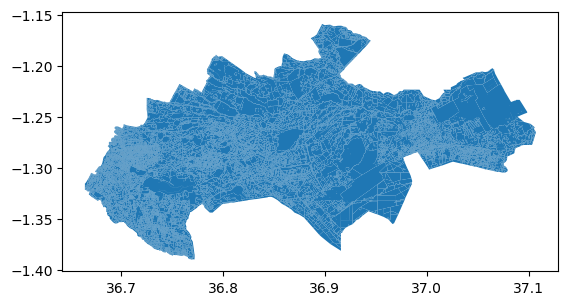

In [96]:
New.plot()

In [97]:
# Export to shp
New.to_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/ClasstoNum/LanduseNum.shp')

/opt/miniconda3/envs/Twitter/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/2_/nk9j6sb901n_fk5dz_9vtqj80000gn/T/ipykernel_35276/3273909558.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  New.to_file('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/ClasstoNum/LanduseNum.shp')


In [99]:
# Export to csv
New.to_csv('/Users/wenlanzhang/Downloads/PhD_UCL/Data/Shp/NairobiLanduse/ClasstoNum/' + 'Landuse.csv', index=False)  # Convert to CSV

# Remove Duplicate Columns

In [32]:
file = '2022-06.csv'
Source = '/Users/wenlanzhang/Downloads/Twitter/Nariobi/'
df = pd.read_csv(Source + file)
df = df.drop(df.columns[[0, 1]], axis=1)
df.to_csv(Source + file, index=False)  

# Define Bounding Box

In [ ]:
shapefile = ?

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))

# # add roads to the plot
# shapefile.plot(ax=ax, alpha=.5)


# add the SJER boundary to the plot
shapefile.plot(ax=ax, markersize=10, color='r')

# add a title for the plot
ax.set_title("Nairobi")

In [ ]:
print(shapefile.total_bounds)